<a href="https://colab.research.google.com/github/josefa-santana/topicosEspeciaisII/blob/main/kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import matplotlib.pyplot as plt #matplotlib
import seaborn as sns
from kneed import KneeLocator #técnica do cotovelo
iris = sns.load_dataset('iris')
from sklearn import cluster
import pandas as pd
#from sklearn.datasets import make_blobs #cria um grupo de dados sitético
from sklearn.cluster import KMeans #utiliza para agrupar os dados
from sklearn.metrics import silhouette_score #número de grupamentos
from sklearn.preprocessing import StandardScaler #padronização dos dado

In [ ]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

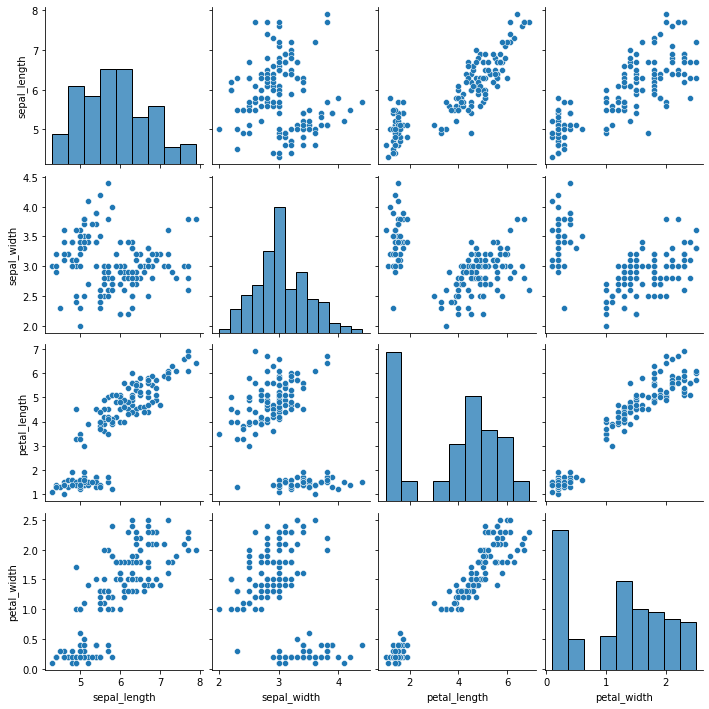

In [ ]:
sns.pairplot(iris)

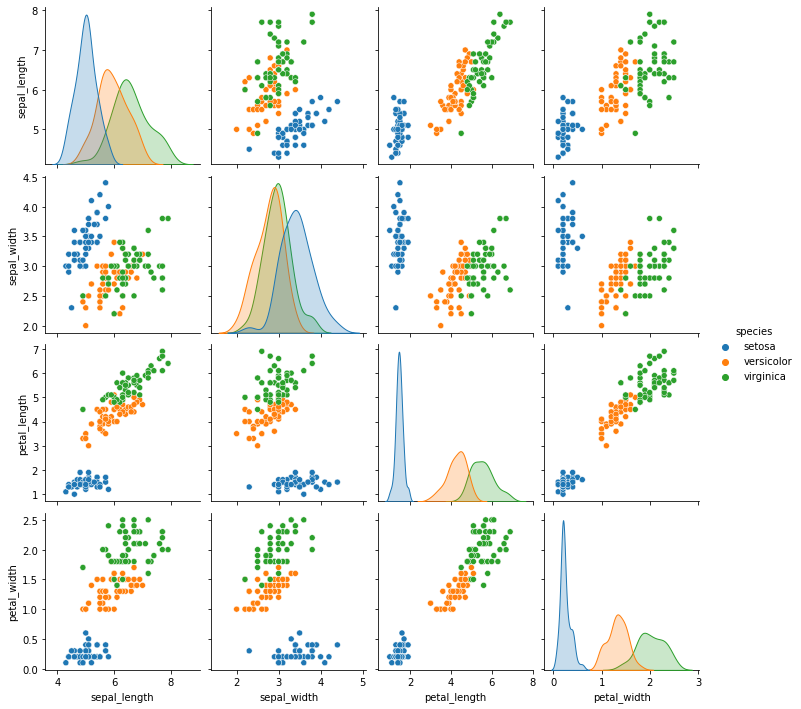

In [ ]:
sns.pairplot(iris, hue='species')

In [ ]:
escala = StandardScaler()

In [ ]:
escala.fit(iris.drop('species', axis=1))

StandardScaler()

In [ ]:
escala_dados = escala.transform(iris.drop('species', axis=1))

In [ ]:
escala_dados

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [ ]:
data_frame = pd.DataFrame(escala_dados, columns= iris.columns[:-1])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_Treino,X_Teste,Y_Treino,Y_Teste = train_test_split(escala_dados, iris['species'], test_size=0.3)

In [ ]:
iris2D = iris[['sepal_length', 'sepal_width']]

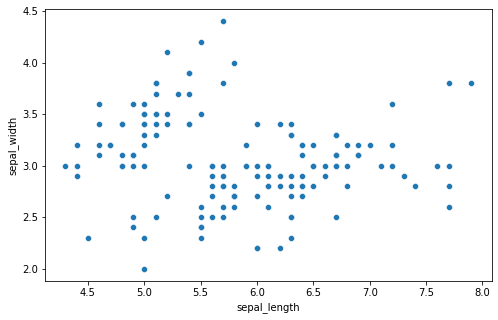

In [ ]:
fig, axe = plt.subplots(figsize=(8,5))
axe = sns.scatterplot(data=iris2D, x='sepal_length', y='sepal_width')
plt.show()

In [ ]:
kmeans = cluster.KMeans(3)
clusters = kmeans.fit_predict(iris2D)

In [ ]:
pd.value_counts(clusters)

2    53
0    50
1    47
dtype: int64

In [ ]:
x_center, y_center = kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1]

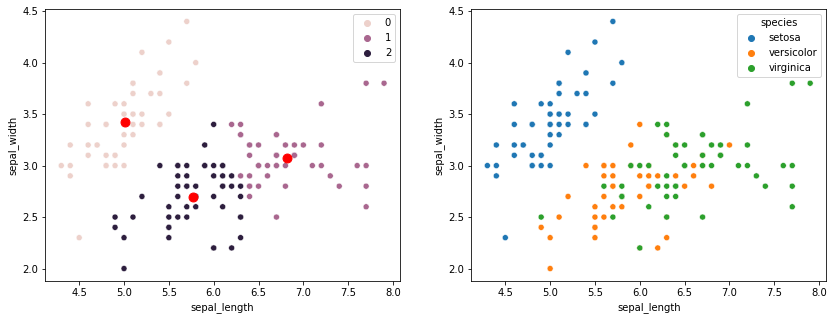

In [ ]:
fig, (axe1, axe2) = plt.subplots(1,2, figsize=(14,5))

sns.scatterplot(data=iris2D, x='sepal_length', y='sepal_width', hue=clusters, ax=axe1)
axe1.scatter(x=x_center, y=y_center, s = 80, color='red')
sns.scatterplot(data=iris, x='sepal_length', y='sepal_width',hue='species', ax=axe2)
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
kmeans_valores={
    'init':'random',
    'n_init':10,
    'max_iter':400,
    'random_state':56
}

SER=[]
for k in range(1,11):
    kmeansCT=KMeans(n_clusters=k, **kmeans_valores)
    kmeansCT.fit(iris2D)
    SER.append(kmeansCT.inertia_)

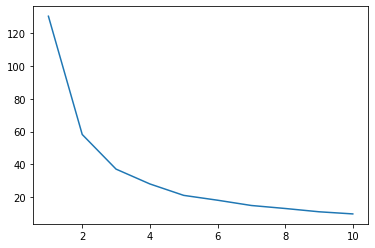

In [ ]:
plt.plot(range(1,11),SER)

In [ ]:
kl=KneeLocator(range(1,11), SER, curve='convex', direction='decreasing')

In [ ]:
kl.elbow

3

In [ ]:
coeficiente_silueta=[]
for k in range(2,11):
  kmeans_S=KMeans(n_clusters=k, **kmeans_valores)
  kmeans_S.fit(iris2D)
  score=silhouette_score(iris2D, kmeans_S.labels_)
  coeficiente_silueta.append(score)

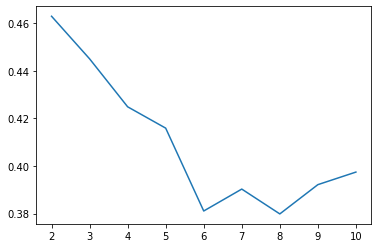

In [ ]:
plt.plot(range(2,11), coeficiente_silueta)